In [1]:
import numpy as np
import os
from astropy.table import Table
from astropy.cosmology import FlatLambdaCDM
from matplotlib import pyplot as plt
from astropy.io import ascii
from astropy.coordinates import SkyCoord 
import healpy
import astropy.units as u
import pandas as pd
import matplotlib
import pyccl
from scipy import stats

os.environ['CLMM_MODELING_BACKEND'] = 'ccl' # here you may choose ccl, nc (NumCosmo) or ct (cluster_toolkit)

import clmm
from clmm.support.sampler import fitters

from importlib import reload  

import sys
sys.path.append('../../')
from magnification_library import *

In [2]:
clmm.__version__

'1.0.0'

In [3]:
matplotlib.rcParams.update({'font.size': 14})

In [4]:
#define cosmology

#astropy object
cosmo = FlatLambdaCDM(H0=71, Om0=0.265, Tcmb0=0 , Neff=3.04, m_nu=None, Ob0=0.0448)

#ccl object
cosmo_ccl = pyccl.Cosmology(Omega_c=cosmo.Om0-cosmo.Ob0, Omega_b=cosmo.Ob0,
                      h=cosmo.h, sigma8= 0.80, n_s=0.963)
#clmm object
cosmo_clmm = clmm.Cosmology(be_cosmo=cosmo_ccl)

In [5]:
path_file = '../../../'

In [6]:
[z_cl, mass_cl, n_halo] = np.load(path_file + "output_data/halo_bin_properties.npy", allow_pickle=True)

In [7]:
Mc_relation = "Diemer15"
mdef = ["matter", "mean"] #differet terminology for ccl and clmm
delta_so=200

In [8]:
dat = np.load(path_file+"input_data/source_sample_properties.npy", allow_pickle=True)

In [9]:
alpha_LBGp, alpha_LBGpp, alpha_Udropp = dat[0][2], dat[1][2], dat[2][2]

## **Magnification and magnification bias profiles measured with TreeCorr**

In [10]:
radius_unit = 'Mpc'

key = 'LBGp'

quant_LBGp = np.load(path_file + "output_data/binned_correlation_fct_"+radius_unit+"_"+key+".npy", allow_pickle=True)
quant_NK_LBGp = np.load(path_file + "output_data/binned_correlation_fct_NK_"+radius_unit+"_"+key+".npy", allow_pickle=True)
mass_eval_mag_LBGp, mass_min_mag_LBGp, mass_max_mag_LBGp = np.load(path_file + "output_data/fitted_mass_from_magnification_"+key+"_"+mdef[0]+str(delta_so)+"_cM_"+Mc_relation+".npy")
mass_eval_LBGp, mass_min_LBGp, mass_max_LBGp = np.load(path_file + "output_data/fitted_mass_from_magnification_bias_"+key+"_"+mdef[0]+str(delta_so)+"_cM_"+Mc_relation+".npy")
radius, model_mubias_LBGp, model_mu_LBGp = np.load(path_file + "output_data/models_"+key+"_"+mdef[0]+str(delta_so)+"_cM_"+Mc_relation+'.npy')


key = 'LBGpp'

quant_LBGpp = np.load(path_file + "output_data/binned_correlation_fct_"+radius_unit+"_"+key+".npy", allow_pickle=True)
quant_NK_LBGpp = np.load(path_file + "output_data/binned_correlation_fct_NK_"+radius_unit+"_"+key+".npy", allow_pickle=True)
mass_eval_mag_LBGpp, mass_min_mag_LBGpp, mass_max_mag_LBGpp = np.load(path_file + "output_data/fitted_mass_from_magnification_"+key+"_"+mdef[0]+str(delta_so)+"_cM_"+Mc_relation+".npy")
mass_eval_LBGpp, mass_min_LBGpp, mass_max_LBGpp = np.load(path_file + "output_data/fitted_mass_from_magnification_bias_"+key+"_"+mdef[0]+str(delta_so)+"_cM_"+Mc_relation+".npy")
radius, model_mubias_LBGpp, model_mu_LBGpp = np.load(path_file + "output_data/models_"+key+"_"+mdef[0]+str(delta_so)+"_cM_"+Mc_relation+'.npy')

key = 'Udropp'

quant_Udropp = np.load(path_file + "output_data/binned_correlation_fct_"+radius_unit+"_"+key+".npy", allow_pickle=True)
quant_NK_Udropp = np.load(path_file + "output_data/binned_correlation_fct_NK_"+radius_unit+"_"+key+".npy", allow_pickle=True)
mass_eval_mag_Udropp, mass_min_mag_Udropp, mass_max_mag_Udropp = np.load(path_file + "output_data/fitted_mass_from_magnification_"+key+"_"+mdef[0]+str(delta_so)+"_cM_"+Mc_relation+".npy")
mass_eval_Udropp, mass_min_Udropp, mass_max_Udropp = np.load(path_file + "output_data/fitted_mass_from_magnification_bias_"+key+"_"+mdef[0]+str(delta_so)+"_cM_"+Mc_relation+".npy")
radius, model_mubias_Udropp, model_mu_Udropp = np.load(path_file + "output_data/models_"+key+"_"+mdef[0]+str(delta_so)+"_cM_"+Mc_relation+'.npy')

## **Comparing magnification profiles**


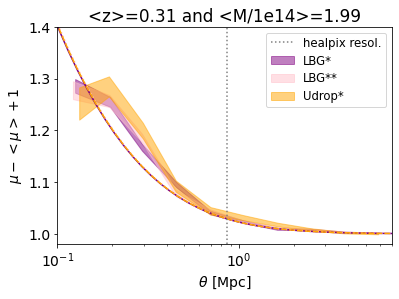

In [11]:
i,j = 0,3

corr_LBGp, corr_LBGpp, corr_Udropp = 1.0175 - 1, 1.0183 - 1, 1.0213 - 1 

plt.title("<z>="+str(round(z_cl[i,j],2)) + " and <M/1e14>="+str(round(mass_cl[i,j]/1e14,2)))

plt.fill_between(quant_NK_LBGp[i,j][0], y1= quant_NK_LBGp[i,j][1] - corr_LBGp - np.sqrt(np.diag(quant_NK_LBGp[i,j][2])),\
                 y2 =  quant_NK_LBGp[i,j][1] - corr_LBGp + np.sqrt(np.diag(quant_NK_LBGp[i,j][2])),color = 'purple', alpha=0.5, label='LBG*')

plt.fill_between(quant_NK_LBGpp[i,j][0], y1= quant_NK_LBGpp[i,j][1] - corr_LBGpp - np.sqrt(np.diag(quant_NK_LBGpp[i,j][2])),\
                 y2 =  quant_NK_LBGpp[i,j][1] - corr_LBGpp + np.sqrt(np.diag(quant_NK_LBGpp[i,j][2])),color = 'pink', alpha=0.5, label='LBG**')

plt.fill_between(quant_NK_Udropp[i,j][0], y1= quant_NK_Udropp[i,j][1] - corr_Udropp - np.sqrt(np.diag(quant_NK_Udropp[i,j][2])),\
                 y2 =  quant_NK_Udropp[i,j][1] - corr_Udropp  + np.sqrt(np.diag(quant_NK_Udropp[i,j][2])),color = 'orange', alpha=0.5, label='Udrop*')


plt.plot(radius[:,i,j], model_mu_LBGp[:,i,j],color='purple')
plt.plot(radius[:,i,j], model_mu_LBGpp[:,i,j],color='pink', ls=':')
plt.plot(radius[:,i,j], model_mu_Udropp[:,i,j],color='orange', ls='--')
    
plt.axvline(1*healpy.nside2resol(4096, arcmin = True), linestyle="dotted", color='grey', label ='healpix resol.')


plt.xscale('log')
plt.xlim(0.1,7)
plt.ylim(0.98,1.4)

plt.xlabel('$\\theta$ ['+radius_unit+']')
plt.ylabel('$\mu - <\mu> + 1$')

plt.legend(fontsize='small', ncol=1)


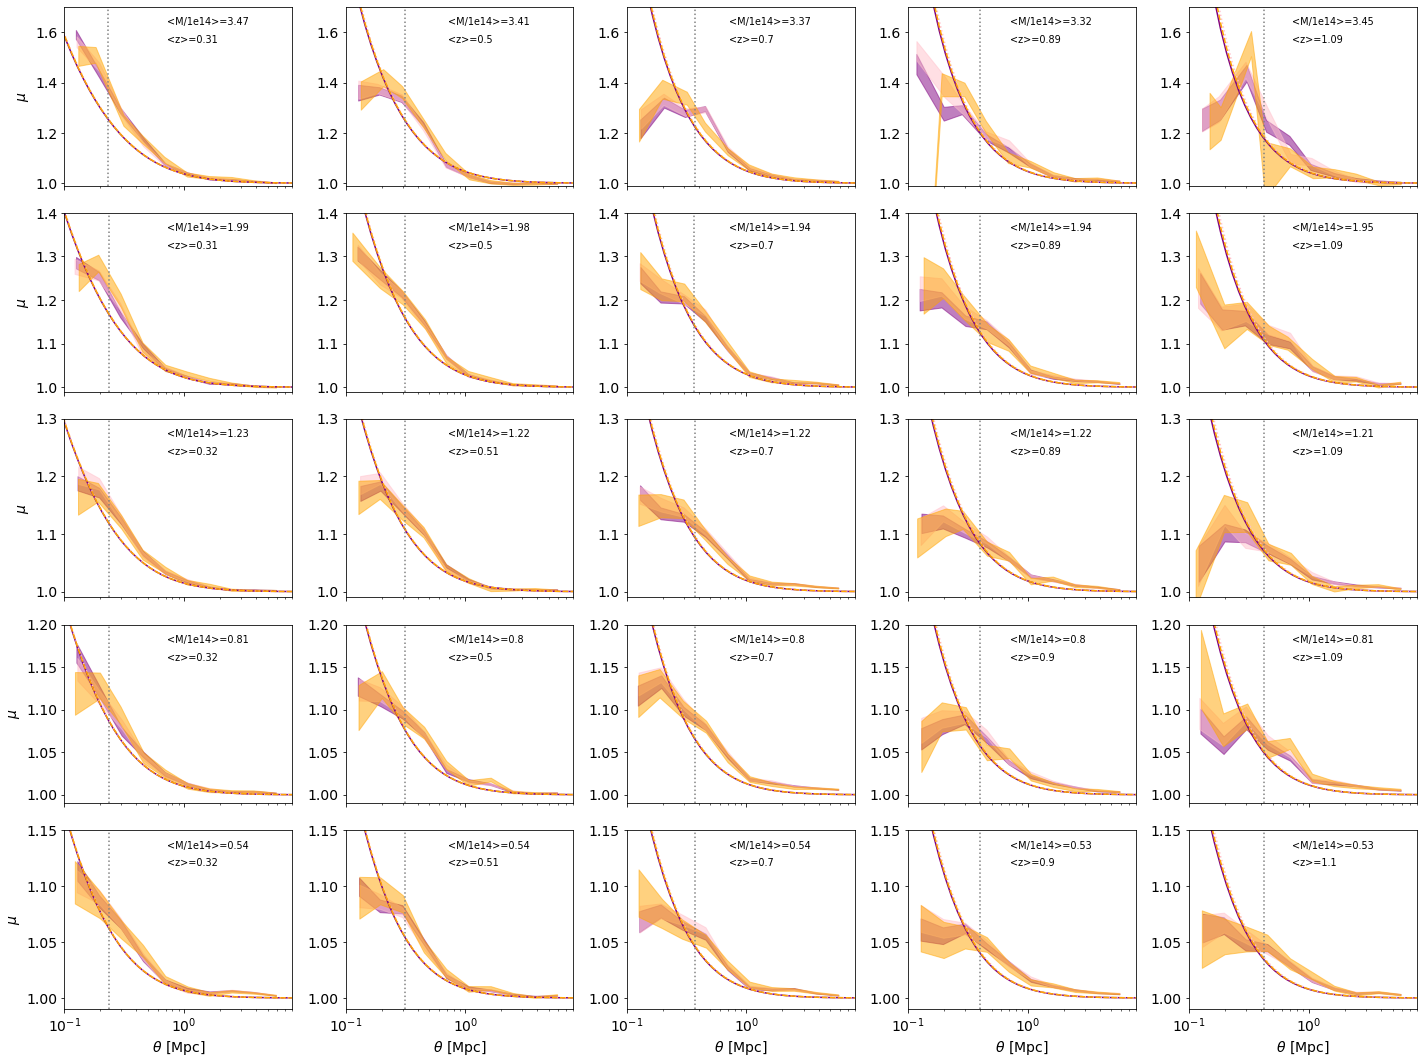

In [12]:
fig, axes = plt.subplots(5,5, figsize=[20,15], sharex=True)

for i,h in zip([0,1,2,3,4],range(5)):
    for j,k in zip([0,1,2,3,4],range(5)):
        
        ax = axes[5-1-k,h]


        ax.fill_between(quant_NK_LBGp[i,j][0], y1= quant_NK_LBGp[i,j][1]  - corr_LBGp - np.sqrt(np.diag(quant_NK_LBGp[i,j][2])),\
                 y2 =  quant_NK_LBGp[i,j][1] - corr_LBGp + np.sqrt(np.diag(quant_NK_LBGp[i,j][2])),color = 'purple', alpha=0.5, label='LBG*')

        ax.fill_between(quant_NK_LBGpp[i,j][0], y1= quant_NK_LBGpp[i,j][1]- corr_LBGpp - np.sqrt(np.diag(quant_NK_LBGpp[i,j][2])),\
                 y2 =  quant_NK_LBGpp[i,j][1]- corr_LBGpp  + np.sqrt(np.diag(quant_NK_LBGpp[i,j][2])),color = 'pink', alpha=0.5, label='LBG**')

        ax.fill_between(quant_NK_Udropp[i,j][0], y1= quant_NK_Udropp[i,j][1] - corr_Udropp - np.sqrt(np.diag(quant_NK_Udropp[i,j][2])),\
                 y2 =  quant_NK_Udropp[i,j][1]- corr_Udropp  + np.sqrt(np.diag(quant_NK_Udropp[i,j][2])),color = 'orange', alpha=0.5, label='Udrop*')

        ax.plot(radius[:,i,j], model_mu_LBGp[:,i,j],color='purple')
        ax.plot(radius[:,i,j], model_mu_LBGpp[:,i,j],color='pink', ls=':')
        ax.plot(radius[:,i,j], model_mu_Udropp[:,i,j],color='orange', ls='--')

        ax.axvline(cosmo.kpc_proper_per_arcmin(z_cl[i,j]).to(u.Mpc/u.arcmin).value * healpy.nside2resol(4096, arcmin = True), linestyle="dotted", color='grey', label ='healpix resol.')

        ax.text(0.45, 0.80, "<z>="+str(round(z_cl[i,j],2)), transform=ax.transAxes, fontsize='x-small')
        ax.text(0.45, 0.90, "<M/1e14>="+str(round(mass_cl[i,j]/1e14,2)), transform=ax.transAxes, fontsize='x-small');
          

[axes[4,j].set_xlabel('$\\theta$ [Mpc]') for j in range(5)]
[axes[i,0].set_ylabel('$\mu$') for i in range(5)]

axes[0,0].set_xscale('log')
axes[0,0].set_xlim(0.1,8)

for i in range(axes.shape[0]):
    axes[4,i].set_ylim(0.99,1.15)
    axes[3,i].set_ylim(0.99,1.2)
    axes[2,i].set_ylim(0.99,1.3)
    axes[1,i].set_ylim(0.99,1.4)
    axes[0,i].set_ylim(0.99,1.7)
                       
plt.tight_layout()

## **Comparing magnification bias profiles**


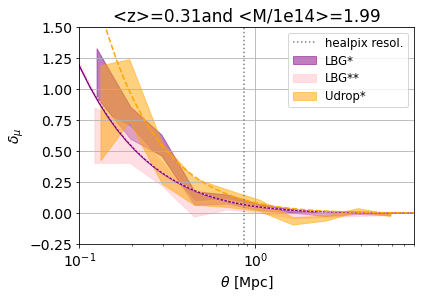

In [13]:
i,j = 0,3

plt.title("<z>="+str(round(z_cl[i,j],2)) + "and <M/1e14>="+str(round(mass_cl[i,j]/1e14,2)))

plt.fill_between(quant_LBGp[i,j][0], y1= quant_LBGp[i,j][1] - np.sqrt(np.diag(quant_LBGp[i,j][2])),\
                 y2 =  quant_LBGp[i,j][1]  + np.sqrt(np.diag(quant_LBGp[i,j][2])),color = 'purple', alpha=0.5, label='LBG*')

plt.fill_between(quant_LBGpp[i,j][0], y1= quant_LBGpp[i,j][1] - np.sqrt(np.diag(quant_LBGpp[i,j][2])),\
                 y2 =  quant_LBGpp[i,j][1]  + np.sqrt(np.diag(quant_LBGpp[i,j][2])),color = 'pink', alpha=0.5, label='LBG**')

plt.fill_between(quant_Udropp[i,j][0], y1= quant_Udropp[i,j][1] - np.sqrt(np.diag(quant_Udropp[i,j][2])),\
                 y2 =  quant_Udropp[i,j][1]  + np.sqrt(np.diag(quant_Udropp[i,j][2])),color = 'orange', alpha=0.5, label='Udrop*')


plt.axvline(1*healpy.nside2resol(4096, arcmin = True), linestyle="dotted", color='grey', label ='healpix resol.')

plt.plot(radius[:,i,j], model_mubias_LBGp[:,i,j],color='purple')
plt.plot(radius[:,i,j], model_mubias_LBGpp[:,i,j],color='pink', ls=':')
plt.plot(radius[:,i,j], model_mubias_Udropp[:,i,j],color='orange', ls='--')
   
    
plt.xscale('log')
plt.xlim(0.1,8)
plt.ylim(-0.25,1.5)
plt.grid()


plt.xlabel('$\\theta$ ['+radius_unit+']')
plt.ylabel('$\delta_{\mu}$')

plt.legend(fontsize='small', ncol=1)


## **Comparing magnification profiles, constrained from magnification bias**


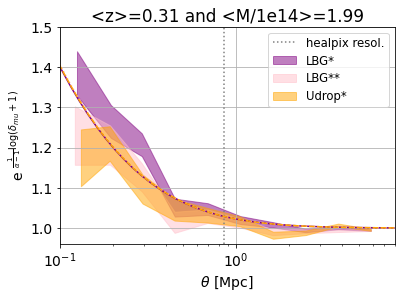

In [14]:
i,j = 0,3

plt.title("<z>="+str(round(z_cl[i,j],2)) + " and <M/1e14>="+str(round(mass_cl[i,j]/1e14,2)))

plt.fill_between(quant_LBGp[i,j][0], y1= np.exp(1/(alpha_LBGp - 1) * np.log(quant_LBGp[i,j][1] +1 - np.sqrt(np.diag(quant_LBGp[i,j][2])))),\
                 y2 =   np.exp(1/(alpha_LBGp - 1) * np.log(quant_LBGp[i,j][1] +1 + np.sqrt(np.diag(quant_LBGp[i,j][2])))),color = 'purple', alpha=0.5, label='LBG*')

plt.fill_between(quant_LBGpp[i,j][0], y1=  np.exp(1/(alpha_LBGpp - 1) * np.log(quant_LBGpp[i,j][1] +1 - np.sqrt(np.diag(quant_LBGpp[i,j][2])))),\
                 y2 =   np.exp(1/(alpha_LBGpp - 1) * np.log(quant_LBGpp[i,j][1] +1 + np.sqrt(np.diag(quant_LBGpp[i,j][2])))),color = 'pink', alpha=0.5, label='LBG**')

plt.fill_between(quant_Udropp[i,j][0], y1=  np.exp(1/(alpha_Udropp - 1) * np.log(quant_Udropp[i,j][1] +1 - np.sqrt(np.diag(quant_Udropp[i,j][2])))),\
                 y2 =   np.exp(1/(alpha_Udropp - 1) * np.log(quant_Udropp[i,j][1] +1  + np.sqrt(np.diag(quant_Udropp[i,j][2])))),color = 'orange', alpha=0.5, label='Udrop*')


plt.axvline(1*healpy.nside2resol(4096, arcmin = True), linestyle="dotted", color='grey', label ='healpix resol.')

plt.plot(radius[:,i,j], model_mu_LBGp[:,i,j],color='purple')
plt.plot(radius[:,i,j], model_mu_LBGpp[:,i,j],color='pink', ls=':')
plt.plot(radius[:,i,j], model_mu_Udropp[:,i,j],color='orange', ls='--')
  
    
plt.xscale('log')
plt.xlim(0.1,8)
plt.ylim(0.96,1.5)
plt.grid()


plt.xlabel('$\\theta$ ['+radius_unit+']')
plt.ylabel('$\delta_{\mu}$')
plt.ylabel(r'e $^{\frac{1}{\alpha - 1} \log(\delta_{mu} + 1) }$')

plt.legend(fontsize='small', ncol=1)


<ipython-input-16-98b3e3e4d536>:14: RuntimeWarning: invalid value encountered in log
  ax.fill_between(quant_Udropp[i,j][0], y1=  np.exp(1/(alpha_Udropp - 1) * np.log(quant_Udropp[i,j][1] +1 - np.sqrt(np.diag(quant_Udropp[i,j][2])))),\
<ipython-input-16-98b3e3e4d536>:14: RuntimeWarning: invalid value encountered in log
  ax.fill_between(quant_Udropp[i,j][0], y1=  np.exp(1/(alpha_Udropp - 1) * np.log(quant_Udropp[i,j][1] +1 - np.sqrt(np.diag(quant_Udropp[i,j][2])))),\


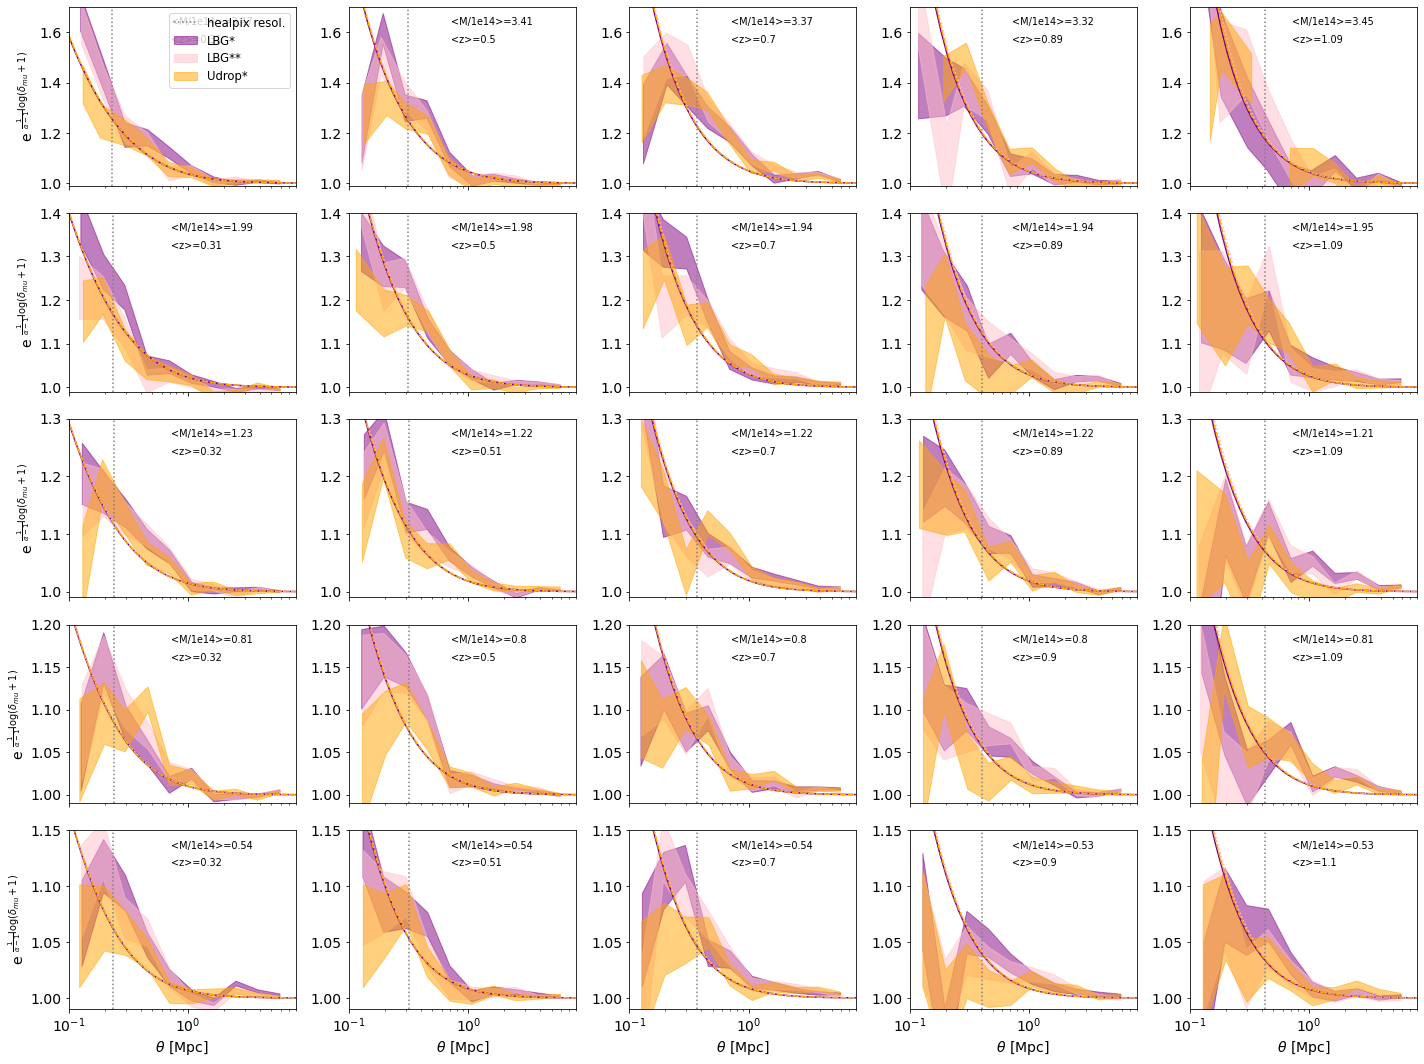

In [16]:
fig, axes = plt.subplots(5,5, figsize=[20,15], sharex=True)

for i,h in zip([0,1,2,3,4],range(5)):
    for j,k in zip([0,1,2,3,4],range(5)):
        
        ax = axes[5-1-k,h]

        ax.fill_between(quant_LBGp[i,j][0], y1= np.exp(1/(alpha_LBGp - 1) * np.log(quant_LBGp[i,j][1] +1 - np.sqrt(np.diag(quant_LBGp[i,j][2])))),\
                 y2 =   np.exp(1/(alpha_LBGp - 1) * np.log(quant_LBGp[i,j][1] +1 + np.sqrt(np.diag(quant_LBGp[i,j][2])))),color = 'purple', alpha=0.5, label='LBG*')

        ax.fill_between(quant_LBGpp[i,j][0], y1=  np.exp(1/(alpha_LBGpp - 1) * np.log(quant_LBGpp[i,j][1] +1 - np.sqrt(np.diag(quant_LBGpp[i,j][2])))),\
                 y2 =   np.exp(1/(alpha_LBGpp - 1) * np.log(quant_LBGpp[i,j][1] +1 + np.sqrt(np.diag(quant_LBGpp[i,j][2])))),color = 'pink', alpha=0.5, label='LBG**')

        ax.fill_between(quant_Udropp[i,j][0], y1=  np.exp(1/(alpha_Udropp - 1) * np.log(quant_Udropp[i,j][1] +1 - np.sqrt(np.diag(quant_Udropp[i,j][2])))),\
                 y2 =   np.exp(1/(alpha_Udropp - 1) * np.log(quant_Udropp[i,j][1] +1  + np.sqrt(np.diag(quant_Udropp[i,j][2])))),color = 'orange', alpha=0.5, label='Udrop*')

        ax.plot(radius[:,i,j], model_mu_LBGp[:,i,j],color='purple')
        ax.plot(radius[:,i,j], model_mu_LBGpp[:,i,j],color='pink', ls=':')
        ax.plot(radius[:,i,j], model_mu_Udropp[:,i,j],color='orange', ls='--')

        ax.axvline(cosmo.kpc_proper_per_arcmin(z_cl[i,j]).to(u.Mpc/u.arcmin).value * healpy.nside2resol(4096, arcmin = True), linestyle="dotted", color='grey', label ='healpix resol.')

        ax.text(0.45, 0.80, "<z>="+str(round(z_cl[i,j],2)), transform=ax.transAxes, fontsize='x-small')
        ax.text(0.45, 0.90, "<M/1e14>="+str(round(mass_cl[i,j]/1e14,2)), transform=ax.transAxes, fontsize='x-small');
          

[axes[4,j].set_xlabel('$\\theta$ [Mpc]') for j in range(5)]
[axes[i,0].set_ylabel(r'e $^{\frac{1}{\alpha - 1} \log(\delta_{mu} + 1) }$')  for i in range(5)]

axes[0,0].legend(fontsize = 'small')

axes[0,0].set_xscale('log')
axes[0,0].set_xlim(0.1,8)

for i in range(axes.shape[0]):
    axes[4,i].set_ylim(0.99,1.15)
    axes[3,i].set_ylim(0.99,1.2)
    axes[2,i].set_ylim(0.99,1.3)
    axes[1,i].set_ylim(0.99,1.4)
    axes[0,i].set_ylim(0.99,1.7)
                       
plt.tight_layout()

## **Comparing mass from  magnification profiles**


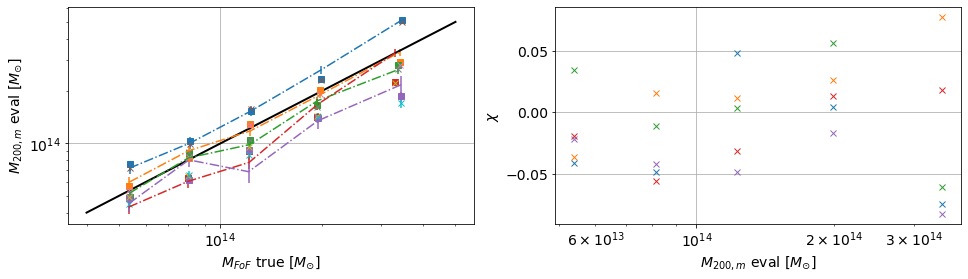

In [194]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))

def plot1(mass_eval_mag, mass_min_mag, mass_max_mag, fmt):

    ax[0].errorbar(mass_cl[0,:], mass_eval_mag[0,:],\
                 yerr = (mass_eval_mag[0,:] - mass_min_mag[0,:], mass_max_mag[0,:] - mass_eval_mag[0,:]),fmt=fmt, label ="z="+str(round(z_cl[0,0],2)))
    ax[0].errorbar(mass_cl[1,:], mass_eval_mag[1,:],\
                 yerr = (mass_eval_mag[1,:] - mass_min_mag[1,:], mass_max_mag[1,:] - mass_eval_mag[1,:]),fmt=fmt, label ="z="+str(round(z_cl[1,0],2)))
    ax[0].errorbar(mass_cl[2,:], mass_eval_mag[2,:],\
                 yerr = (mass_eval_mag[2,:] - mass_min_mag[2,:], mass_max_mag[2,:] - mass_eval_mag[2,:]),fmt=fmt, label ="z="+str(round(z_cl[2,0],2)))
    ax[0].errorbar(mass_cl[3,:], mass_eval_mag[3,:],\
                 yerr = (mass_eval_mag[3,:] - mass_min_mag[3,:], mass_max_mag[3,:] - mass_eval_mag[3,:]),fmt=fmt, label ="z="+str(round(z_cl[3,0],2)))
    ax[0].errorbar(mass_cl[4,:], mass_eval_mag[4,:],\
                 yerr = (mass_eval_mag[4,:] - mass_min_mag[4,:], mass_max_mag[4,:] - mass_eval_mag[4,:]),fmt=fmt, label ="z="+str(round(z_cl[4,0],2)))


plot1(mass_eval_mag_LBGp, mass_min_mag_LBGp, mass_max_mag_LBGp , 's')
plot1(mass_eval_mag_LBGpp, mass_min_mag_LBGpp, mass_max_mag_LBGpp , 'x')
plot1(mass_eval_mag_Udropp, mass_min_mag_Udropp, mass_max_mag_Udropp , '-.')

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].plot((4e13, 5e14),(4e13,5e14), color='black', lw=2)
#ax[0].legend(fontsize='small')
ax[0].set_xlabel("$M_{FoF}$ true [$M_{\odot}$]")
ax[0].set_ylabel("$M_{200,m}$ eval [$M_{\odot}$]")

ax[0].grid()


#ax[1].loglog(mass_eval_mag_LBGp, mass_eval_mag_LBGpp,'.')
#ax[1].plot((4e13, 5e14),(4e13,5e14), color='black', lw=2)
#ax[1].plot((4e13, 5e14),(1.1*4e13,1.1*5e14), color='black', lw=1)
#ax[1].plot((4e13, 5e14),(0.9*4e13,0.9*5e14), color='black', lw=1)

#ax[1].plot(mass_cl[0,:], (mass_eval_mag_LBGpp - mass_eval_mag_LBGp) /np.sqrt((mass_max_mag_LBGpp - mass_min_mag_LBGpp)**2 + (mass_max_mag_LBGp - mass_min_mag_LBGp)**2), 'x')
#ax[1].plot(mass_cl[0,:], (mass_eval_mag_Udropp - mass_eval_mag_LBGp) /np.sqrt((mass_max_mag_Udropp - mass_min_mag_Udropp)**2 + (mass_max_mag_LBGp - mass_min_mag_LBGp)**2 ), 'd')


ax[1].plot(mass_cl[0,:], (mass_eval_mag_LBGpp - mass_eval_mag_LBGp) / mass_eval_mag_LBGp, 'x')
#ax[1].plot(mass_cl[0,:], (mass_eval_mag_Udropp - mass_eval_mag_LBGp) / mass_eval_mag_LBGp, 'd')

ax[1].set_ylabel("$\chi$")
ax[1].set_xlabel("$M_{200,m}$ eval [$M_{\odot}$]")


ax[1].set_xscale('log')

ax[1].grid()

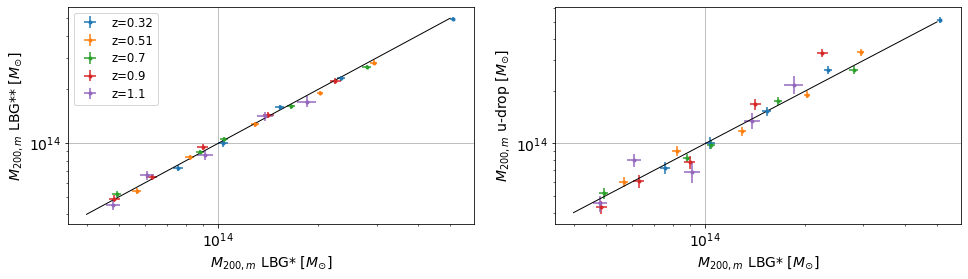

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))


[ax[0].errorbar(mass_eval_mag_LBGp[i,:], mass_eval_mag_LBGpp[i,:],\
               xerr = (mass_eval_mag_LBGp[i,:] - mass_min_mag_LBGp[i,:], mass_max_mag_LBGp[i,:] - mass_eval_mag_LBGp[i,:]),\
               yerr = (mass_eval_mag_LBGpp[i,:] - mass_min_mag_LBGpp[i,:], mass_max_mag_LBGpp[i,:] - mass_eval_mag_LBGpp[i,:]),\
               fmt='.', label ="z="+str(round(z_cl[i,0],2))) for i in range(5)]


ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].plot((4e13, 5e14),(4e13,5e14), color='black', lw=1)
ax[0].legend(fontsize='small')
ax[0].set_xlabel("$M_{200,m}$ LBG* [$M_{\odot}$]")
ax[0].set_ylabel("$M_{200,m}$ LBG** [$M_{\odot}$]")

ax[0].grid()


[ax[1].errorbar(mass_eval_mag_LBGp[i,:], mass_eval_mag_Udropp[i,:],\
               xerr = (mass_eval_mag_LBGp[i,:] - mass_min_mag_LBGp[i,:], mass_max_mag_LBGp[i,:] - mass_eval_mag_LBGp[i,:]),\
               yerr = (mass_eval_mag_Udropp[i,:] - mass_min_mag_Udropp[i,:], mass_max_mag_Udropp[i,:] - mass_eval_mag_Udropp[i,:]),\
               fmt='.', label ="z="+str(round(z_cl[i,0],2))) for i in range(5)]


ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].plot((4e13, 5e14),(4e13,5e14), color='black', lw=1)
#ax[0].legend(fontsize='small')
ax[1].set_xlabel("$M_{200,m}$ LBG* [$M_{\odot}$]")
ax[1].set_ylabel("$M_{200,m}$ u-drop [$M_{\odot}$]")

ax[1].grid()


In [18]:
def stat(diff, diff_err):
    print("$\chi$ stats \n", \
      "mean",np.round(np.mean((diff/diff_err).flatten()),2),\
      ", mean err", np.round(np.std((diff/diff_err).flatten())/np.sqrt(25),2),\
      ", std", np.round(np.std((diff/diff_err).flatten()),2),\
      ", std approx err", np.round(np.std((diff/diff_err).flatten())/np.sqrt(2*(25-1)),2))

In [19]:
stat(abs(mass_eval_mag_LBGpp - mass_eval_mag_LBGp ), mass_eval_mag_LBGp)

$\chi$ stats 
 mean 0.04 , mean err 0.0 , std 0.02 , std approx err 0.0


In [20]:
stat(abs(mass_eval_mag_Udropp - mass_eval_mag_LBGp) , mass_eval_mag_LBGp)

$\chi$ stats 
 mean 0.11 , mean err 0.02 , std 0.1 , std approx err 0.02


In [21]:
stat((mass_eval_mag_LBGpp - mass_eval_mag_LBGp) , np.sqrt((mass_max_mag_LBGpp - mass_min_mag_LBGpp)**2 + (mass_max_mag_LBGp - mass_min_mag_LBGp)**2 ))

$\chi$ stats 
 mean -0.09 , mean err 0.07 , std 0.37 , std approx err 0.05


In [22]:
stat((mass_eval_mag_Udropp - mass_eval_mag_LBGp) , np.sqrt((mass_max_mag_Udropp - mass_min_mag_Udropp)**2 + (mass_max_mag_LBGp - mass_min_mag_LBGp)**2 ))

$\chi$ stats 
 mean 0.14 , mean err 0.16 , std 0.81 , std approx err 0.12


## **Comparing mass from  magnification bias profiles**


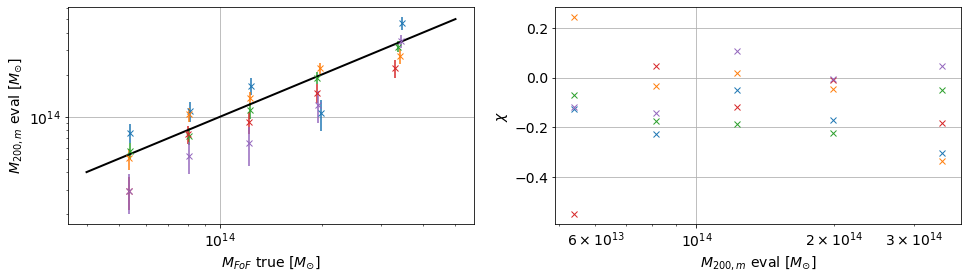

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))

def plot1(mass_eval_mag, mass_min_mag, mass_max_mag, fmt):

    ax[0].errorbar(mass_cl[0,:], mass_eval_mag[0,:],\
                 yerr = (mass_eval_mag[0,:] - mass_min_mag[0,:], mass_max_mag[0,:] - mass_eval_mag[0,:]),fmt=fmt, label ="z="+str(round(z_cl[0,0],2)))
    ax[0].errorbar(mass_cl[1,:], mass_eval_mag[1,:],\
                 yerr = (mass_eval_mag[1,:] - mass_min_mag[1,:], mass_max_mag[1,:] - mass_eval_mag[1,:]),fmt=fmt, label ="z="+str(round(z_cl[1,0],2)))
    ax[0].errorbar(mass_cl[2,:], mass_eval_mag[2,:],\
                 yerr = (mass_eval_mag[2,:] - mass_min_mag[2,:], mass_max_mag[2,:] - mass_eval_mag[2,:]),fmt=fmt, label ="z="+str(round(z_cl[2,0],2)))
    ax[0].errorbar(mass_cl[3,:], mass_eval_mag[3,:],\
                 yerr = (mass_eval_mag[3,:] - mass_min_mag[3,:], mass_max_mag[3,:] - mass_eval_mag[3,:]),fmt=fmt, label ="z="+str(round(z_cl[3,0],2)))
    ax[0].errorbar(mass_cl[4,:], mass_eval_mag[4,:],\
                 yerr = (mass_eval_mag[4,:] - mass_min_mag[4,:], mass_max_mag[4,:] - mass_eval_mag[4,:]),fmt=fmt, label ="z="+str(round(z_cl[4,0],2)))


#plot1(mass_eval_LBGp, mass_min_LBGp, mass_max_LBGp , 's')
plot1(mass_eval_LBGpp, mass_min_LBGpp, mass_max_LBGpp , 'x')
#plot1(mass_eval_Udropp, mass_min_Udropp, mass_max_Udropp , '-.')

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].plot((4e13, 5e14),(4e13,5e14), color='black', lw=2)
#ax[0].legend(fontsize='small')
ax[0].set_xlabel("$M_{FoF}$ true [$M_{\odot}$]")
ax[0].set_ylabel("$M_{200,m}$ eval [$M_{\odot}$]")

ax[0].grid()


#ax[1].loglog(mass_eval_mag_LBGp, mass_eval_mag_LBGpp,'.')
#ax[1].plot((4e13, 5e14),(4e13,5e14), color='black', lw=2)
#ax[1].plot((4e13, 5e14),(1.1*4e13,1.1*5e14), color='black', lw=1)
#ax[1].plot((4e13, 5e14),(0.9*4e13,0.9*5e14), color='black', lw=1)

#ax[1].plot(mass_cl[0,:], (mass_eval_LBGpp - mass_eval_LBGp) /np.sqrt((mass_max_LBGpp - mass_min_LBGpp)**2 + (mass_max_LBGp - mass_min_LBGp)**2), 'x')
#ax[1].plot(mass_cl[0,:], (mass_eval_Udropp - mass_eval_LBGp) /np.sqrt((mass_max_Udropp - mass_min_Udropp)**2 + (mass_max_LBGp - mass_min_LBGp)**2 ), 'd')

ax[1].plot(mass_cl[0,:], (mass_eval_LBGpp - mass_eval_LBGp) / mass_eval_LBGp, 'x')
#ax[1].plot(mass_cl[0,:], (mass_eval_Udropp - mass_eval_LBGp) / mass_eval_LBGp, 'd')


ax[1].set_ylabel("$\chi$")
ax[1].set_xlabel("$M_{200,m}$ eval [$M_{\odot}$]")


ax[1].set_xscale('log')

ax[1].grid()

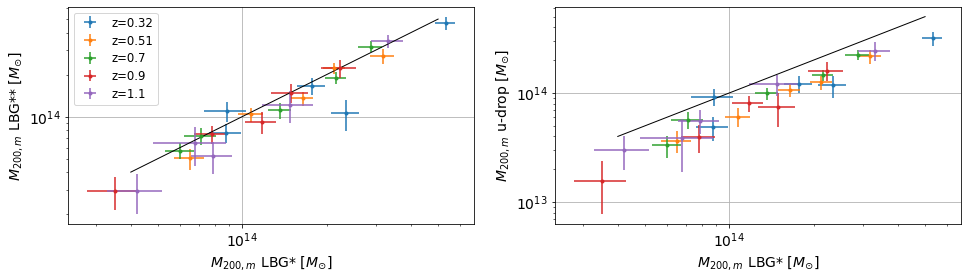

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))


[ax[0].errorbar(mass_eval_LBGp[i,:], mass_eval_LBGpp[i,:],\
               xerr = (mass_eval_LBGp[i,:] - mass_min_LBGp[i,:], mass_max_LBGp[i,:] - mass_eval_LBGp[i,:]),\
               yerr = (mass_eval_LBGpp[i,:] - mass_min_LBGpp[i,:], mass_max_LBGpp[i,:] - mass_eval_LBGpp[i,:]),\
               fmt='.', label ="z="+str(round(z_cl[i,0],2))) for i in range(5)]


ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].plot((4e13, 5e14),(4e13,5e14), color='black', lw=1)
ax[0].legend(fontsize='small')
ax[0].set_xlabel("$M_{200,m}$ LBG* [$M_{\odot}$]")
ax[0].set_ylabel("$M_{200,m}$ LBG** [$M_{\odot}$]")

ax[0].grid()


[ax[1].errorbar(mass_eval_LBGp[i,:], mass_eval_Udropp[i,:],\
               xerr = (mass_eval_LBGp[i,:] - mass_min_LBGp[i,:], mass_max_LBGp[i,:] - mass_eval_LBGp[i,:]),\
               yerr = (mass_eval_Udropp[i,:] - mass_min_Udropp[i,:], mass_max_Udropp[i,:] - mass_eval_Udropp[i,:]),\
               fmt='.', label ="z="+str(round(z_cl[i,0],2))) for i in range(5)]


ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].plot((4e13, 5e14),(4e13,5e14), color='black', lw=1)
#ax[0].legend(fontsize='small')
ax[1].set_xlabel("$M_{200,m}$ LBG* [$M_{\odot}$]")
ax[1].set_ylabel("$M_{200,m}$ u-drop [$M_{\odot}$]")

ax[1].grid()


In [25]:
stat((mass_eval_LBGpp - mass_eval_LBGp) , np.sqrt((mass_max_LBGpp - mass_min_LBGpp)**2 + (mass_max_LBGp - mass_min_LBGp)**2 ))

$\chi$ stats 
 mean -0.29 , mean err 0.09 , std 0.43 , std approx err 0.06


In [26]:
stat((mass_eval_LBGpp - mass_eval_Udropp) , np.sqrt((mass_max_LBGpp - mass_min_LBGpp)**2 + (mass_max_Udropp - mass_min_Udropp)**2 ))

$\chi$ stats 
 mean 0.67 , mean err 0.09 , std 0.47 , std approx err 0.07


In [27]:
stat((mass_eval_Udropp - mass_eval_LBGp) , np.sqrt((mass_max_Udropp - mass_min_Udropp)**2 + (mass_max_LBGp - mass_min_LBGp)**2 ))

$\chi$ stats 
 mean -0.99 , mean err 0.09 , std 0.44 , std approx err 0.06
